In [1]:
import pandas as pd
import torch
data = pd.read_csv(r"C:\Users\linda\Desktop\慈琳\慈琳\大學三年級\新型學習演算法\Final_Project\heart_disease.csv")
data = data.dropna()

In [2]:
#random select 80% of the data
data = data.sample(frac=0.4, random_state=1)
train = data.sample(frac=0.8, random_state=1)  # Sample 80% for training
test = data.drop(train.index)  # Remove the sampled rows for test data

In [3]:
new_data = train.drop(columns=["HeartDiseaseorAttack"])
data_result = train["HeartDiseaseorAttack"].to_frame()

In [4]:
#data preprocessing
import numpy as np
new_data /= np.std(new_data, axis=0)

In [5]:
initializing_data = new_data.head(22)
initializing_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
47233,2.021278,0.000000,5.333325,5.844221,0.000000,5.04188,0.000000,2.328266,2.07443,2.554008,...,4.613653,0.0,3.745583,2.035228,0.344710,2.672636,0.000000,3.279703,4.057161,1.925139
155802,2.021278,2.022557,5.333325,3.146888,2.013885,0.00000,0.000000,0.000000,0.00000,2.554008,...,4.613653,0.0,4.681979,0.000000,3.447103,2.672636,0.000000,3.935643,2.028580,0.481285
31110,2.021278,0.000000,5.333325,3.746295,2.013885,0.00000,0.000000,2.328266,0.00000,0.000000,...,4.613653,0.0,1.872792,0.678409,0.000000,0.000000,2.014481,2.623762,4.057161,0.481285
144453,2.021278,2.022557,5.333325,5.994073,0.000000,0.00000,1.429453,0.000000,2.07443,2.554008,...,4.613653,0.0,2.809187,0.000000,0.000000,0.000000,2.014481,1.967822,4.057161,3.850279
9976,0.000000,0.000000,5.333325,3.146888,0.000000,0.00000,0.000000,2.328266,2.07443,2.554008,...,4.613653,0.0,0.936396,0.000000,0.000000,0.000000,0.000000,3.607673,5.071451,2.406424
30538,0.000000,0.000000,5.333325,4.045999,0.000000,0.00000,0.000000,2.328266,2.07443,2.554008,...,4.613653,0.0,1.872792,0.678409,0.114903,0.000000,0.000000,1.311881,5.071451,3.850279
11122,0.000000,0.000000,5.333325,4.045999,0.000000,0.00000,0.000000,2.328266,2.07443,2.554008,...,4.613653,0.0,0.936396,0.949773,0.114903,0.000000,0.000000,1.967822,6.085741,3.850279
234938,0.000000,0.000000,5.333325,3.146888,0.000000,0.00000,0.000000,2.328266,2.07443,2.554008,...,4.613653,0.0,0.936396,0.000000,0.344710,0.000000,0.000000,2.951732,5.071451,3.850279
230237,0.000000,0.000000,5.333325,4.645406,2.013885,0.00000,2.858907,2.328266,0.00000,2.554008,...,4.613653,0.0,3.745583,0.000000,1.723552,0.000000,2.014481,3.279703,6.085741,3.850279
243316,0.000000,0.000000,5.333325,3.296740,0.000000,0.00000,0.000000,2.328266,2.07443,2.554008,...,4.613653,0.0,1.872792,0.000000,0.000000,0.000000,0.000000,1.967822,6.085741,2.887709


In [6]:
initializing_data_result = data_result.head(22)
initializing_data_result

,HeartDiseaseorAttack
47233,0.0
155802,1.0
31110,0.0
144453,0.0
9976,0.0
30538,0.0
11122,0.0
234938,0.0
230237,0.0
243316,0.0


In [7]:
initializing_tensor_data = torch.tensor(initializing_data.values).to(torch.float32)
print(initializing_tensor_data.size())
initializing_tensor_result = torch.tensor(initializing_data_result.values).to(torch.float32)
print(initializing_tensor_result.size())

torch.Size([22, 21])
torch.Size([22, 1])


In [8]:
N = initializing_data.shape[0] #row
D_in = initializing_data.shape[1] #feature
#hidden nodes
H = 1
D_out = 1

In [9]:
##Relu
initializing_model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [10]:
learning_rate = 0.01
epochs = 50

#L2 regularization weight_decay=1e-5
optimizer = torch.optim.Adam(initializing_model.parameters(), lr = learning_rate, weight_decay=1e-5)

sum_abs_diff tensor(17.1492, grad_fn=<SumBackward0>)
epoch 1, loss = 0.48294523, lr = 0.011000
sum_abs_diff tensor(23.0795, grad_fn=<SumBackward0>)
epoch 2, loss = 0.41972220, lr = 0.012100
sum_abs_diff tensor(29.6876, grad_fn=<SumBackward0>)
Meet the stopping criterion, an acceptable SLFN


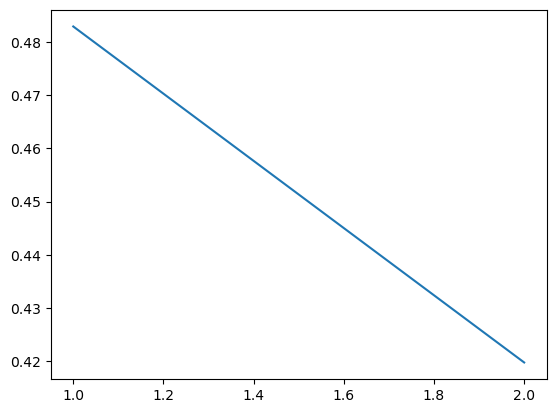

In [11]:
import matplotlib.pyplot as plt

lossValue = []
epochValue = []
#weight_tuning_LG
epoch = 0

previous = 10000000000.0

loss_criterion1 = 5

while True:
    y_predict = initializing_model(initializing_tensor_data)
    y_pre = torch.sigmoid(y_predict)
    
    loss_function = torch.nn.BCELoss()
    loss = loss_function(y_pre, initializing_tensor_result)
    
    
    abs_diff = torch.abs(initializing_model(initializing_tensor_data) - initializing_tensor_result)
    sum_abs_diff = torch.sum(abs_diff)
    print("sum_abs_diff",sum_abs_diff)

    
    if (sum_abs_diff < loss_criterion1):
        print("acceptable SLFN")
        break
    else:
           
        #weight_tuning_LG
        if(loss.item()<0.4):
            print("Meet the stopping criterion, an acceptable SLFN")
            break
    
    
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
    
        #scheduler.step()
    
        #舊的loss function跟新的loss function做比較
        if(loss.item()<previous):
            optimizer.param_groups[0]["lr"] = optimizer.param_groups[0]["lr"]*1.1
        else:
            #learning rate做比較
            if(optimizer.param_groups[0]["lr"]>0.0001):
                optimizer.param_groups[0]["lr"] = optimizer.param_groups[0]["lr"]*0.9
            else:
                print("An unacceptable SLFN")
                break
    
        previous = loss.item()
    
        epoch += 1
    
    print(f'epoch {epoch}, loss = {loss.item():.8f}, lr = {optimizer.param_groups[0]["lr"]:.6f}')
    lossValue.append(loss.item())
    epochValue.append(epoch)

plt.plot(epochValue,lossValue)

In [12]:
#data_x 是 n+1筆 的 training X
#data_y 是 n+1筆 的 training X
import numpy as np
def LTS(model, data_x, data_y):
    global loss_data_x
    global loss_data_y
    global max_loss
    
    max_loss = 0
    for i,j in zip(data_x,data_y):
        
        y_predict = model(i)
        y_pre = torch.sigmoid(y_predict)
    
        loss_function = torch.nn.BCELoss()
        loss = loss_function(y_pre, j) ** 2
        
        if loss > max_loss:
            max_loss = loss
            loss_data_x = i
            loss_data_y = j

#最大的loss_x 是 loss_data_x
#最大的loss_y 是 loss_data_y

In [13]:
def calculate_accuracy(predictions, targets):
    # Round the predictions to the nearest integer (0 or 1)
    rounded_predictions = torch.round(predictions)
    
    # Compare the rounded predictions with the targets
    correct = (rounded_predictions == targets).float()
    
    # Calculate the accuracy as the average of correct predictions
    accuracy = correct.sum() / correct.size(0)
    
    return accuracy.item()

In [14]:
def weight_tuning(model,train_data,train_result):
    global previous
    previous = 10000000000.0
    global lossValue
    global epochValue
    global epoch
    #用來判斷是acceptable or unacceptable 要往哪裡走
    global condition
    global loss_number
    
#     print("weight_tuning train_data size", train_data.size())
#     print("weight_tuning model weight0" ,model[0].weight.data.size())
#     print("weight_tuning model bias0",model[0].bias.data.size())
#     print("weight_tuning model weight1",model[2].weight.data.size())
    
    while True:
        y_predict = model(train_data)
        y_pre = torch.sigmoid(y_predict)
        loss_function = torch.nn.BCELoss()
        loss = loss_function(y_pre, train_result)
        abs_diff = torch.abs(y_pre - train_result)
        avg_abs_diff = torch.sum(abs_diff)/n
        print("avg_abs_diff",avg_abs_diff)
        
        lossValue.append(loss.item())
        epochValue.append(epoch)
    
        if (avg_abs_diff < loss_criterion):
            condition = "acceptable"
            #print(f'epoch {epoch}, loss = {loss.item():.8f}, lr = {optimizer.param_groups[0]["lr"]:.6f}')
            lossValue.append(loss.item())
            epochValue.append(epoch)
            print("acceptable SLFN")
            break
        else:
            if loss.item()<0.2:
                condition = "acceptable"
                #print(f'epoch {epoch}, loss = {loss.item():.8f}, lr = {optimizer.param_groups[0]["lr"]:.6f}')
                lossValue.append(loss.item())
                epochValue.append(epoch)
                print("Meet the stopping criterion, an acceptable SLFN")
                break
    
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()
    
            #scheduler.step()
    
            #舊的loss function跟 新的loss function做比較
            if(loss.item()<previous):
                print("great wave")
                optimizer.param_groups[0]["lr"] = optimizer.param_groups[0]["lr"]*1.05
            else:
                #learning rate做比較
                if(optimizer.param_groups[0]["lr"]>0.0001):
                    optimizer.param_groups[0]["lr"] = optimizer.param_groups[0]["lr"]*0.95
                else:
                    condition = "unacceptable"
                    print("An unacceptable SLFN")
                    #print(f'epoch {epoch}, loss = {loss.item():.8f}, lr = {optimizer.param_groups[0]["lr"]:.6f}')
                    lossValue.append(loss.item())
                    epochValue.append(epoch)
                    print("Meet the stopping criterion, an acceptable SLFN")
                    break
    
            previous = loss.item()
    
            epoch += 1
    
        #print(f'epoch {epoch}, loss = {loss.item():.8f}, lr = {optimizer.param_groups[0]["lr"]:.6f}')
        loss_number = loss.item()
        accuracy = calculate_accuracy(y_pre, train_result)

        # Print the accuracy
        #print(f'Accuracy: {accuracy:.2%}')

In [15]:
existing_weights = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)

# Example new weight
new_weight = torch.tensor([7, 8, 9])  # Shape: (3,)

# Add a new weight to the existing weight tensor
new_weight = new_weight.unsqueeze(0) # Add a new dimension
print(new_weight)
updated_weights = torch.cat((existing_weights, new_weight), dim=0)

# Print the updated weight tensor
print(updated_weights)

tensor([[7, 8, 9]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [16]:
updated_bias = torch.tensor([4, 5, 6])
bias1 = torch.tensor([4])
bias2 = torch.tensor([87])
print(updated_bias.unsqueeze(0).unsqueeze(0))
updated_bias = torch.cat((updated_bias.unsqueeze(0), bias1.unsqueeze(0)), dim = 1)
print(updated_bias.squeeze(0))
updated_bias = torch.squeeze(updated_bias)
updated_bias = torch.cat((updated_bias.unsqueeze(0), bias2.unsqueeze(0)), dim = 1)
updated_bias

tensor([[[4, 5, 6]]])
tensor([4, 5, 6, 4])


tensor([[ 4,  5,  6,  4, 87]])

In [17]:
#可能有錯
def analogizing(model,k_x,k_y,c_x,c_y):
    zeta = torch.tensor(0.001, dtype=torch.float32)
    gamma = torch.randint(1, 11, (D_in,))
    a = torch.sqrt(torch.sum(torch.square(gamma)))# Length = 1
    gamma = gamma / a  # Normalize gamma
    gamma_t = torch.t(gamma)
    
    #gamma_t = torch.tensor(gamma_t, dtype = torch.float32)

    
    model_old = model
        
    for i,j in zip(c_x,c_y):
        
        #print("type i", type(i), i.shape)
        #print("type k_x", type(k_x), k_x.shape)
        #print(k_x.reshape(-1, 1).shape)
        #print("type gamma t", type(gamma_t))
        #print("gamma t", gamma_t)

            
        isolating1 = torch.matmul(i - k_x, gamma_t) * zeta
        isolating2 = (zeta + isolating1) * (zeta - isolating1)
        print("isolating1: ", isolating1)
        
        if isolating1 != 0 and isolating2 < 0:
            #這裡要下去做weight = r的計算
            #add three hidden node
            input_size = model[0].in_features
            output_size = model[-1].out_features
            
            original_bias = model[0].bias.data
            original_weights = model[0].weight.data
            original_weights2 = model[2].weight.data
            
            updated_bias = original_bias #先給初始值 
            updated_weights = original_weights #先給初始值
            updated_weights2 = original_weights2 #先給初始值

            new_hidden_layer = torch.nn.Linear(D_in, 3 + model[0].out_features)
            new_output_layer = torch.nn.Linear(3 + model[0].out_features, 1)


            
            for i in range(3):
                #new_hidden_nodes = 1
                #new_hidden_layer = torch.nn.Linear(input_size, new_hidden_nodes + model[0].out_features)
                #new_output_layer = torch.nn.Linear(new_hidden_nodes + model[0].out_features, 1)
                
                #print('k_x.shape:', k_x.reshape(-1, 1).shape)
                #print('gamma_t.shape:', gamma_t.shape)
                
                

                if i==0:
                    
                    bias1 = zeta - torch.matmul(k_x,gamma_t) #.reshape(-1, 1)
                    weight1 = (k_y - model_old(k_x))/zeta
                    
                    #updated_bias = torch.squeeze(updated_bias)
                    
                    #print("original weight 2 size:", original_weights2.size())
                    #print("weight 1 size:", weight1.reshape(1,-1).size())
                    #print("weight 1:", weight1)


                    updated_weights = torch.cat((original_weights, gamma.reshape(1,-1)), dim = 0)
                    updated_weights2 = torch.cat((original_weights2, weight1.unsqueeze(0)), dim = 1)
                    
                           
                    #print("bias1", bias1)
                    #print("bias1 size", bias1.unsqueeze(0).size())
                    #print("updated bias size", updated_bias.size())


                    updated_bias = torch.cat((updated_bias.unsqueeze(0), bias1.unsqueeze(0).unsqueeze(0)), dim = 1)
                    updated_bias = torch.squeeze(updated_bias)
                    
                    updated_weights2 = torch.squeeze(updated_weights2)
                    


                elif i==1:
                    bias1 = - torch.matmul(k_x,gamma_t)
                    #(k_y-放舊的model的y x_k帶入?)/zeta
                    weight1 = -2*(k_y-model_old(k_x))/zeta
                    
                    updated_weights = torch.cat((updated_weights, gamma.reshape(1,-1)), dim = 0)

                    updated_weights2 = torch.cat((updated_weights2.unsqueeze(0), weight1.unsqueeze(0)), dim = 1)
                    

                    updated_bias = torch.cat((updated_bias.unsqueeze(0), bias1.unsqueeze(0).unsqueeze(0)), dim = 1)
                    updated_bias = torch.squeeze(updated_bias)

                    updated_weights2 = torch.squeeze(updated_weights2)
                    
                else:
                    bias1 = -zeta - torch.matmul(k_x,gamma_t)
                    weight1 = (k_y-model_old(k_x))/zeta
                    
                    updated_weights = torch.cat((updated_weights, gamma.reshape(1,-1)), dim = 0)
                    updated_weights2 = torch.cat((updated_weights2.unsqueeze(0), weight1.unsqueeze(0)), dim = 1)
                    


                    updated_bias = torch.cat((updated_bias.unsqueeze(0), bias1.unsqueeze(0).unsqueeze(0)), dim = 1)
                    updated_bias = torch.squeeze(updated_bias)
                    
                    updated_weights2 = torch.squeeze(updated_weights2)

            
            #model[-1] = new_hidden_layer
            #model.add_module('new_activation', torch.nn.ReLU())  # Add a new activation function layer
            #model.add_module('new_output', new_output_layer)  # Add the new output layer
            
            #test

            # Increase the number of neurons in the layer
            #new_fc = nn.Linear(model.fc.in_features, 30)  # Increase the number of neurons to 30

            # Copy the weights from the existing layer to the new layer
            new_hidden_layer.weight.data = updated_weights
            new_hidden_layer.bias.data = updated_bias
            new_output_layer.weight.data = updated_weights2.reshape(1,-1)

            # Replace the existing layer in the model
            model[0] = new_hidden_layer
            model[2] = new_output_layer
            
            print("something equals to zero")
            break
        else:
            gamma = torch.randint(1, 11, (D_in,))
            a = torch.sqrt(torch.sum(torch.square(gamma)))# Length = 1
            gamma = gamma / a  # Normalize gamma
            gamma_t = torch.t(gamma)       

In [18]:
import copy
def network_tuning(model,train_data,train_result):
    epoch_times = 500
    loss_limit = 230
    k = 1
    previous = 0
    epoch = 0
    #此model hidden node的數量
    Hidden = model[0].out_features
    if Hidden <= 1:
        print("only one hidden node")
    else:
        while True:
            if Hidden <= 1:
                #這裡要加loss
                print("only one hidden node")
                break
            model_old = copy.deepcopy(model)
            y_predict = model(train_data)
            y_pre = torch.sigmoid(y_predict)
            loss_function = torch.nn.BCELoss()
            loss = loss_function(y_pre, train_result)

            #store w
            current_weight0 = model[0].weight.clone()
            current_bias0 = model[0].bias.data.clone()
            current_weight1 = model[2].weight.clone()
            current_bias1 = model[2].bias.data.clone()
            #Step2 the weight between the ith hidden node and the output node
            weights_oi = torch.abs(model[2].weight.clone())
            sort_weight,indices = weights_oi.sort()
            #print("weights_oi1",sort_weight[0])
            #print("weights_oi2",sort_weight[2])
            k = torch.argmin(weights_oi)
            #print("weights_oi",weights_oi)
            #print("k",k)

            #print("network_tuning hidden node: ", model[0].out_features)
            #hidden node -= 1
            H_new = model[0].out_features - 1
            model[0] = torch.nn.Linear(D_in ,H_new)
            #H, D_out
            model[2] = torch.nn.Linear(H_new, D_out)
            #print("network_tuning hidden: ", model[0].out_features)

            #刪除第k個hidden node
            #切weight0 跟 切 weight1 是不是不能一樣
            weight0 = torch.cat((current_weight0[:k], current_weight0[k+1:]), dim=0)
            bias0 = torch.cat((current_bias0[:k], current_bias0[k+1:]), dim=0)
            weight1 = torch.cat((current_weight1[:, :k], current_weight1[:, k + 1:]), dim=1)

            model[0].weight.data = weight0
            model[0].bias.data = bias0
            model[2].weight.data = weight1

            #apply weight_tuning
            weight_tuning(model,train_data,train_result)

            #print("network_tuning data",train_data.size())
            #print("network_tuning result",train_result.shape.size())

            if condition == "acceptable":
                #go back to step1
                if(model[0].out_features<=1):
                    print("only one hidden node")
                    break
                else:
                    print("network_tuning acceptable")
                    continue
    
            else:
                #restore network and stop
                #hidden node 數量 weight都要回復
                #這裡要多殺幾個hidden node
                #殺第二小的 跟 第三小的等等
                model = model_old
                break

23
train_data torch.Size([23, 21])
avg_abs_diff tensor(0.2734, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.2296, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1937, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1659, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1455, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1310, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1209, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1139, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1091, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1058, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1034, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1017, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.1004, grad_fn=<DivBackward0>)
great wave
avg_abs_diff tensor(0.0992, grad_fn=<DivBackward0>)
acceptable SLFN
only one hidden node
Acceptable
n: 23, loss = 0.18842171, lr = 0.022816
23
24


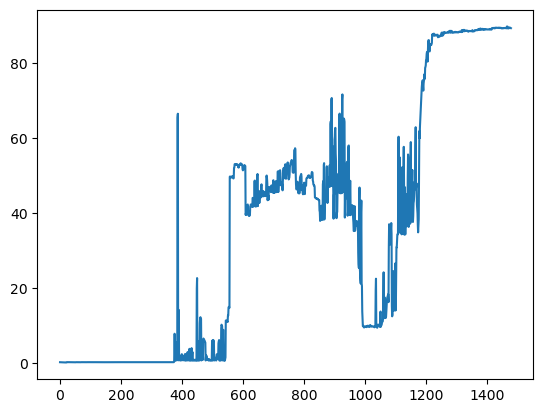

In [19]:
import matplotlib.pyplot as plt
import numpy as np


model = initializing_model

# feature
n = new_data.shape[1] + 1
n += 1

#loss_criterion 這裡還要重新設定 因為是加總的所以 還要根據幾筆資料下去乘以一個倍率 才能得到每一筆的loss_criterion
loss_criterion = 0.1
epoch = 0
loss1 = []
loss2 = []
loss3 = []

loss_record = []

blue = 0 # weight - analogizing - network
red = 0 # weight - network
green = 0 # network

while n <= 1500:
    print(n)
    train_data = torch.tensor(new_data.head(n).values).to(torch.float32)
    print("train_data",train_data.size())
    train_result = torch.tensor(data_result.head(n).values).to(torch.float32)

    LTS(initializing_model, train_data, train_result)
    
    #找出train_data, train_result except max loss
    #這裡要在確定一下
    index_x = torch.argmax(loss_data_x)
    train_data_c = torch.cat((train_data[:index_x], train_data[index_x+1:]), dim=0)
    index_y = torch.argmax(loss_data_y)
    train_result_c = torch.cat((train_result[:index_y], train_result[index_y+1:]), dim=0)

    # model will keep updating

    #learning goal 要不要看max_loss在多少以下就直接network tuning
    #print("max_loss",max_loss)

    if max_loss < 0.01:
        # network tuning
        #這裡只會有一個hidden node 可以殺嗎
        network_tuning(model,train_data,train_result)
        loss1.append(loss_number)
        green += 1
        
    else:
        # save weights
        # weight: input layer to hidden node
        weight0 = model[0].weight.data.clone()
        bias0 = model[0].bias.data.clone()
        # weight: hidden node to output
        weight1 = model[2].weight.data.clone()
        bias1 = model[2].bias.data.clone()

        # weight tuning
        weight_tuning(model, train_data, train_result)

        # determine if acceptable or not
        if condition == "acceptable":
            # network tuning
            network_tuning(model,train_data,train_result)
            #loss2.append(loss_number)
            print("Acceptable")
            red += 1
        else:
            # restore weights
            model[0].weight.data = weight0
            model[0].bias.data = bias0
            model[2].weight.data = weight1
            model[2].bias.data = bias1
            # analogizing
            # the maximum loss is loss_data_x, loss_data_y
            #if(model[0].out_features<500):
            analogizing(model,loss_data_x,loss_data_y,train_data_c,train_result_c)
            network_tuning(model,train_data,train_result)
            loss3.append(loss_number)
            blue += 1
    
    y_predict = model(train_data)
    y_pre = torch.sigmoid(y_predict)
    loss_function = torch.nn.BCELoss()
    loss = loss_function(y_pre, train_result)
    loss_record.append(loss.item())
    print(f'n: {n}, loss = {loss.item():.8f}, lr = {optimizer.param_groups[0]["lr"]:.6f}')
    print(n)
    n += 1

plt.plot(loss_record)
#plt.plot(epochValue,lossValue)

In [20]:
print(initializing_model[2].weight.data.size())
#print(initializing_model[2].weight.data)
print(initializing_model[0].weight.data.size())
#print(initializing_model[0].weight.data)
print(initializing_model[0].bias.data.size())
print(initializing_model[2].bias.data.size())

torch.Size([1, 2209])
torch.Size([2209, 21])
torch.Size([2209])
torch.Size([1])


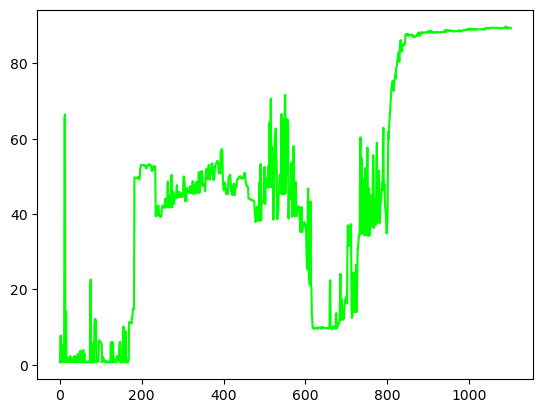

In [21]:
plt.plot(range(len(loss1)), loss1, color='blue', label='Loss 1')
#plt.plot(range(len(loss2)), loss2, color='red', label='Loss 2')
plt.plot(range(len(loss3)), loss3, color='#00FF00', label='Loss 3')

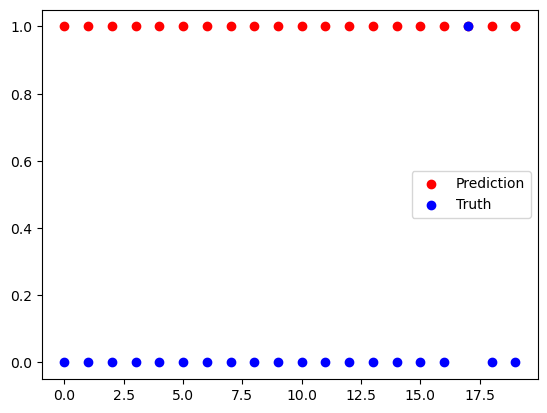

In [22]:
import matplotlib.pyplot as plt

test_data = torch.tensor(test.drop(columns=["HeartDiseaseorAttack"]).values).to(torch.float32)
test_result = torch.tensor(test["HeartDiseaseorAttack"].to_frame().values).to(torch.float32)

test_data = test_data[:20]
test_result = test_result[:20]

y_predict1 = initializing_model(test_data)
y_predict1 = torch.sigmoid(y_predict1)  # Apply sigmoid function to the predicted results

for i in range(len(y_predict1)):
    if y_predict1[i] < 0.5:
        y_predict1[i] = 0
    else:
        y_predict1[i] = 1

plt.scatter(range(len(y_predict1)), y_predict1.detach().numpy(), c='r', label='Prediction')  # Predicted results
plt.scatter(range(len(test_result)), test_result.detach().numpy(), c='b', label='Truth')  # True labels
plt.legend()
plt.show()
